## Loading basic Python and R imports

In [2]:
%load_ext rpy2.ipython
%load_ext autoreload
%autoreload 2

%matplotlib inline  
from matplotlib import rcParams
rcParams['figure.figsize'] = (16, 100)

import warnings
from rpy2.rinterface import RRuntimeWarning
warnings.filterwarnings("ignore") # Ignore all warnings
# warnings.filterwarnings("ignore", category=RRuntimeWarning) # Show some warnings

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import display, HTML

Error importing in API mode: ImportError("dlopen(/Users/hgorledeenn/.pyenv/versions/3.13.9/lib/python3.13/site-packages/_rinterface_cffi_api.abi3.so, 0x0002): Library not loaded: /Library/Frameworks/R.framework/Versions/4.5-arm64/Resources/lib/libRblas.dylib\n  Referenced from: <B96A8100-FA7A-3EFC-8726-931D26646DE6> /Users/hgorledeenn/.pyenv/versions/3.13.9/lib/python3.13/site-packages/_rinterface_cffi_api.abi3.so\n  Reason: tried: '/Library/Frameworks/R.framework/Versions/4.5-arm64/Resources/lib/libRblas.dylib' (no such file), '/System/Volumes/Preboot/Cryptexes/OS/Library/Frameworks/R.framework/Versions/4.5-arm64/Resources/lib/libRblas.dylib' (no such file), '/Library/Frameworks/R.framework/Versions/4.5-arm64/Resources/lib/libRblas.dylib' (no such file)")
Trying to import in ABI mode.


# Answer the questions below. Explain your reasoning. 

In [3]:
%%R

require('tidyverse')

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.6
✔ forcats   1.0.1     ✔ stringr   1.6.0
✔ ggplot2   4.0.1     ✔ tibble    3.3.1
✔ lubridate 1.9.4     ✔ tidyr     1.3.2
✔ purrr     1.2.1     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors


Loading required package: tidyverse


# Last Year's Polly (Anonymized)


### Question 1: Are Dhrumil's students more stressed than Irena's?

In [4]:
%%R

# read some functions from the functions.R file
source('functions.R')

In [5]:
%%R -o q_emotions

q_emotions <- read_csv('emotion.csv', show_col_types = FALSE) |> 
        mutate(date=as.Date(date), 
        emoji = factor(emoji, levels=c('😍', '🙂', '😐', '🙁', '😢'))) 

q_emotions


# A tibble: 585 × 6
   date       user_id                          choice_id emoji question editor 
   <date>     <chr>                                <dbl> <fct> <chr>    <chr>  
 1 2022-05-13 aa516cd83ca47c4c0707d31047f6dc8a         2 😍    emotion  Dhrumil
 2 2022-05-13 5a7ac9a0ee30d1e7bedafd9046162fc7         1 🙂    emotion  Dhrumil
 3 2022-05-13 fb6da81da7c9b66f4dfd266096bca702         2 😍    emotion  Dhrumil
 4 2022-05-13 f2dfc7b67a37987df95bd920a81a5cd3         1 🙂    emotion  Irena  
 5 2022-05-13 764f85855c5a57c62401a0834eda0fc9         1 🙂    emotion  Dhrumil
 6 2022-05-13 95ba860ed905cf268092ca1e90f91dd6         2 😍    emotion  Irena  
 7 2022-05-13 3ce992bb73ea135b1c738ef290cb93d5         2 😍    emotion  Dhrumil
 8 2022-05-13 c21a2438c0e9308e03a92ebd90c5d27d         0 😐    emotion  Dhrumil
 9 2022-05-13 89135d5c75496c9d94251f30c748b9b8        -2 😢    emotion  Irena  
10 2022-05-13 5119dd707d353a28b41fa1adcdda76be         2 😍    emotion  Dhrumil
# ℹ 575 more rows
# ℹ Use `pri

In [6]:
%%R -w 1200
# plot_type_1(q_emotions)

NULL


In [7]:
q_emotions = pd.read_csv('emotion.csv', parse_dates=['date'])
q_emotions

,date,user_id,choice_id,emoji,question,editor
0,2022-05-13,aa516cd83ca47c4c0707d31047f6dc8a,2,😍,emotion,Dhrumil
1,2022-05-13,5a7ac9a0ee30d1e7bedafd9046162fc7,1,🙂,emotion,Dhrumil
2,2022-05-13,fb6da81da7c9b66f4dfd266096bca702,2,😍,emotion,Dhrumil
3,2022-05-13,f2dfc7b67a37987df95bd920a81a5cd3,1,🙂,emotion,Irena
4,2022-05-13,764f85855c5a57c62401a0834eda0fc9,1,🙂,emotion,Dhrumil
...,...,...,...,...,...,...
580,2022-01-21,aa516cd83ca47c4c0707d31047f6dc8a,2,😍,emotion,Dhrumil
581,2022-01-21,4716f7a2eee28bddd0e115f021642950,2,😍,emotion,Dhrumil
582,2022-01-21,8b728352298677976121c9bcf5f2a578,1,🙂,emotion,Irena
583,2022-01-21,5a7ac9a0ee30d1e7bedafd9046162fc7,1,🙂,emotion,Dhrumil


### What is your null hypothesis?
👉 Dhrumil's students are equally as stressed as Irena's on average

### What is your alternative hypothesis?
👉 Dhrumil's students are not equally as stressed as Irena's on average

In [9]:
%%R -i q_emotions

dhrumil_students <- q_emotions |> filter(editor == 'Dhrumil')
irena_students <- q_emotions |> filter(editor == 'Irena')

# Conduct a t-test to see if choice_id mean is different for editors

t.test(dhrumil_students$choice_id, irena_students$choice_id)


	Welch Two Sample t-test

data:  dhrumil_students$choice_id and irena_students$choice_id
t = 1.7076, df = 582.95, p-value = 0.08825
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 -0.01825952  0.26141742
sample estimates:
mean of x mean of y 
0.7566667 0.6350877 



### With a p-value of 0.88, we fail to reject the null hypothesis that Dhrumil's students are equally as stressed as Irena's students

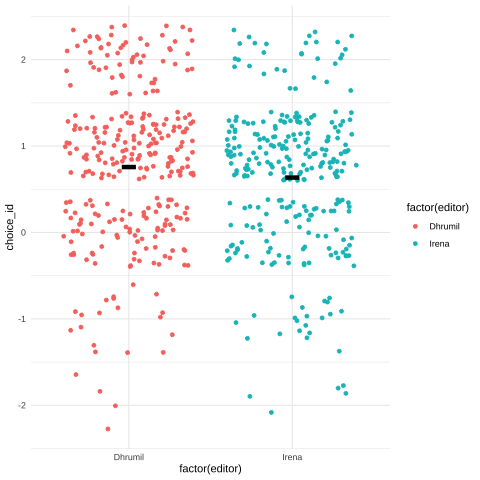

In [16]:
%%R
# Make a plot (a visual representation) of the t-test you conducted above

ggplot(q_emotions) +
    aes(x=factor(editor), y=choice_id, color=factor(editor)) +
    # geom_point(size=4, alpha=.4) +
    geom_jitter() +
    stat_summary(fun = "mean", geom = "point", size = 20, shape="-", color="black") +
    theme_minimal()

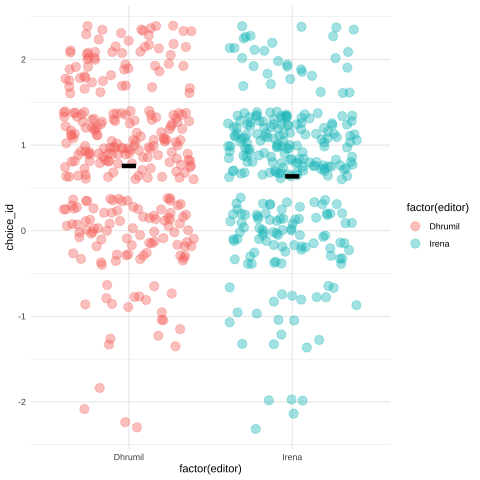

In [18]:
%%R
# Make a plot (a visual representation) of the t-test you conducted above

ggplot(q_emotions) +
    aes(x=factor(editor), y=choice_id, color=factor(editor)) +
    # geom_point(size=4, alpha=.4) +
    geom_jitter(size=4, alpha=.4) +
    stat_summary(fun = "mean", geom = "point", size = 20, shape="-", color="black") +
    theme_minimal()

### Interpret the results in reader facing language. What conclusion have you drawn?

👉 Dhrumil might have slightly happier students based on our sample, but the difference is not statistically significant

### Question 2: Do Dhrumil's students have a heavier workload than Irena's?

In [19]:
%%R 

q_workload <- read_csv('workload.csv', show_col_types = FALSE)
q_workload

# A tibble: 543 × 5


   date       user_id                          choice_id question editor 
   <date>     <chr>                                <dbl> <chr>    <chr>  
 1 2022-05-13 aa516cd83ca47c4c0707d31047f6dc8a         2 workload Dhrumil
 2 2022-05-13 5a7ac9a0ee30d1e7bedafd9046162fc7         4 workload Irena  
 3 2022-05-13 fb6da81da7c9b66f4dfd266096bca702         6 workload Dhrumil
 4 2022-05-13 f2dfc7b67a37987df95bd920a81a5cd3         3 workload Dhrumil
 5 2022-05-13 764f85855c5a57c62401a0834eda0fc9         4 workload Dhrumil
 6 2022-05-13 95ba860ed905cf268092ca1e90f91dd6         2 workload Irena  
 7 2022-05-13 3ce992bb73ea135b1c738ef290cb93d5         5 workload Irena  
 8 2022-05-13 c21a2438c0e9308e03a92ebd90c5d27d         4 workload Irena  
 9 2022-05-13 a9864a7d130ce52cf17579545fc96643         5 workload Dhrumil
10 2022-05-13 5119dd707d353a28b41fa1adcdda76be         1 workload Dhrumil
# ℹ 533 more rows
# ℹ Use `print(n = ...)` to see more rows


In [20]:
%%R -w 1200

# Data at a glance
plot_type_2(q_workload)

Error:
! Providing a labeller with `variable` and `value` arguments was
  deprecated in ggplot2 2.0.0 and is now defunct.
Run `rlang::last_trace()` to see where the error occurred.

Error:


RInterpreterError: Failed to parse and evaluate line '\n# Data at a glance\nplot_type_2(q_workload)\n'.
R error message: 'Error:'

In [21]:
q_workload = pd.read_csv('workload.csv', parse_dates=['date'])
q_workload

,date,user_id,choice_id,question,editor
0,2022-05-13,aa516cd83ca47c4c0707d31047f6dc8a,2,workload,Dhrumil
1,2022-05-13,5a7ac9a0ee30d1e7bedafd9046162fc7,4,workload,Irena
2,2022-05-13,fb6da81da7c9b66f4dfd266096bca702,6,workload,Dhrumil
3,2022-05-13,f2dfc7b67a37987df95bd920a81a5cd3,3,workload,Dhrumil
4,2022-05-13,764f85855c5a57c62401a0834eda0fc9,4,workload,Dhrumil
...,...,...,...,...,...
538,2022-01-28,5119dd707d353a28b41fa1adcdda76be,6,workload,Dhrumil
539,2022-01-28,b049b7eae43713e6aca6320c57b3bb88,8,workload,Irena
540,2022-01-28,5a7ac9a0ee30d1e7bedafd9046162fc7,6,workload,Irena
541,2022-01-28,2ab5e1542adfb5cbd739a0e443d7408b,5,workload,Irena


### What is your null hypothesis?
👉 There is no difference in the workload of Dhrumil's students and Irena's students.

### What is your alternative hypothesis?
👉 There is a difference in the workload of Dhrumil's students and Irena's students.

In [22]:
%%R -i q_workload

dhrumil_students <- q_workload |> filter(editor == 'Dhrumil')
irena_students <- q_workload |> filter(editor == 'Irena')

# Conduct a t-test to see if choice_id mean is different for editors

t.test(dhrumil_students$choice_id, irena_students$choice_id)


	Welch Two Sample t-test

data:  dhrumil_students$choice_id and irena_students$choice_id
t = -1.4969, df = 498.05, p-value = 0.1351
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 -0.52867962  0.07145615
sample estimates:
mean of x mean of y 
 6.658120  6.886731 



### We fail to reject the null hypothesis that there is no difference in the average workload of Dhrumil's students and Irena's students

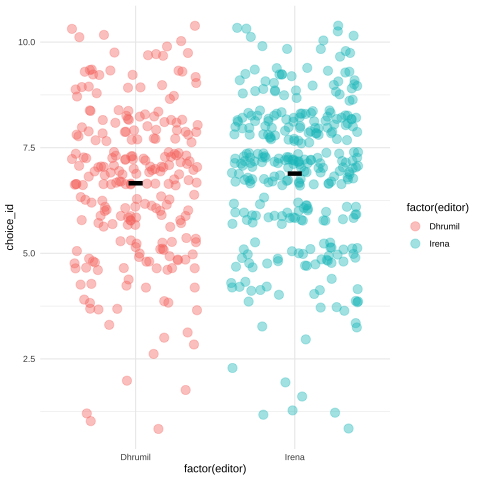

In [23]:
%%R
# Make a plot (a visual representation) of the t-test you conducted above

ggplot(q_workload) +
    aes(x=factor(editor), y=choice_id, color=factor(editor)) +
    # geom_point(size=4, alpha=.4) +
    geom_jitter(size=4, alpha=.4) +
    stat_summary(fun = "mean", geom = "point", size = 20, shape="-", color="black") +
    theme_minimal()

### Interpret the results. What conclusion have you drawn?

👉 Dhrumil's might have a slightly lower workload than Irena's students based on our sample, but the difference is not statistically significant